# UNEMPLOYMENT ANALYSIS WITH PYTHON

#### Author - Praneesh Sharma

### Importing Libraries

In [2]:
!pip install plotly

In [110]:
#for manipulating the dataset
import pandas as pd

#for working on the data
import numpy as np

#for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(7,5)})

import warnings
warnings.filterwarnings('ignore')

### Importing the dataset

We are given 2 datasets, lets explore and find the difference between them.

In [148]:
data = pd.read_csv("Unemployment in India.csv",skipinitialspace = True)
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [31]:
data_2 = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")
data_2.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [149]:
#dimensions of the first dataset
print("FIRST Dataset:\nNumber of rows : %d\nNumber of columns : %d" %(data.shape))
print("\n\nSecond Dataset:\nNumber of rows : %d\nNumber of columns : %d" %(data2.shape))

FIRST Dataset:
Number of rows : 768
Number of columns : 7


Second Dataset:
Number of rows : 267
Number of columns : 9


#### Pre-Processing dataset 1

In [150]:
#checking for null values
data.isnull().sum()

Region                                     28
Date                                       28
Frequency                                  28
Estimated Unemployment Rate (%)            28
Estimated Employed                         28
Estimated Labour Participation Rate (%)    28
Area                                       28
dtype: int64

There are 28 null values in the given dataset

In [151]:
#removing all the null values
data = data.dropna()

In [152]:
for col in data.columns:
    print(col)

Region
Date
Frequency
Estimated Unemployment Rate (%)
Estimated Employed
Estimated Labour Participation Rate (%)
Area


As seen here, some column names have white spaces as well as special characters. Let's remove them for easier access.

In [153]:
data.columns = ['Region','Date','Frequency','Unemployment_Rate','Employed','Labour_Participation_Rate','Area']
data.head()

,Region,Date,Frequency,Unemployment_Rate,Employed,Labour_Participation_Rate,Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [169]:
#converting date column from string type to datetime type
data['Date'] = data['Date'].astype('datetime64[ns]')

#splitting the date column into date, month and year

data["Day"] = data['Date'].map(lambda x: x.day)
data["Month"] = data['Date'].map(lambda x: x.month)
data["Year"] = data['Date'].map(lambda x: x.year)

data.head()

,Region,Date,Frequency,Unemployment_Rate,Employed,Labour_Participation_Rate,Area,day,month,year,Day,Month,Year
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,31,5,2019,31,5,2019
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,30,6,2019,30,6,2019
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,31,7,2019,31,7,2019
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,31,8,2019,31,8,2019
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,30,9,2019,30,9,2019


#### Pre-Processing dataset 2

In [130]:
#checking for null values
data2.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

This is a clean datset.

In [131]:
for col in data2.columns:
    print(col)

Region
 Date
 Frequency
 Estimated Unemployment Rate (%)
 Estimated Employed
 Estimated Labour Participation Rate (%)
Region.1
longitude
latitude


As seen here, some column names have white spaces as well as special characters. Let's remove them for easier access.

In [132]:
data2.columns = ['Region','Date','Frequency','Unemployment_Rate','Employed','Labour_Participation_Rate',
                 'Area','longitude','latutide']
data2.head()

,Region,Date,Frequency,Unemployment_Rate,Employed,Labour_Participation_Rate,Area,longitude,latutide
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [185]:
#converting date column from string type to datetime type
data2['Date'] = data2['Date'].astype('datetime64[ns]')

#splitting the date column into date, month and year
data2["Day"] = data2['Date'].map(lambda x: x.day)
data2["Month"] = data2['Date'].map(lambda x: x.month)
data2["Year"] = data2['Date'].map(lambda x: x.year)

data2.head()

,Region,Date,Frequency,Unemployment_Rate,Employed,Labour_Participation_Rate,Area,longitude,latutide,day,month,year,Day,Month,Year
0,Andhra Pradesh,2019-05-31,M,5.48,16635535,41.02,South,15.9129,79.74,31,5,2019,31,5,2019
1,Andhra Pradesh,2019-06-30,M,5.83,16545652,40.90,South,15.9129,79.74,30,6,2019,30,6,2019
2,Andhra Pradesh,2019-07-31,M,5.79,15881197,39.18,South,15.9129,79.74,31,7,2019,31,7,2019
3,Andhra Pradesh,2019-08-31,M,20.51,11336911,33.10,South,15.9129,79.74,31,8,2019,31,8,2019
4,Andhra Pradesh,2019-09-30,M,17.43,12988845,36.46,South,15.9129,79.74,30,9,2019,30,9,2019


### Exploratory Data Analysis

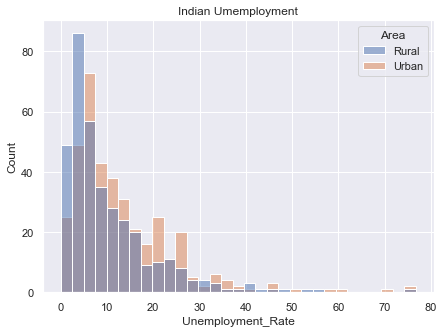

In [186]:
#dataset1
plt.title("Indian Umemployment")
sns.histplot(x="Unemployment_Rate",hue="Area",data=data)
plt.show()

The unemployment rate in Rural areas was significantly more than that of Urban areas in the pre-covid times

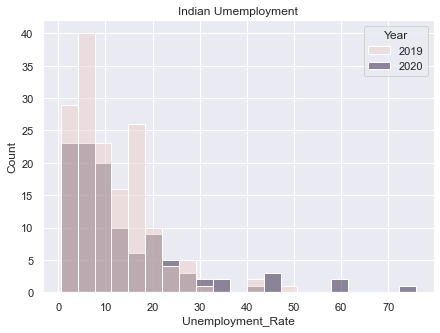

In [224]:
#dataset2
plt.title("Indian Umemployment")
sns.histplot(x="Unemployment_Rate",hue="Year",data=data2)
plt.show()

As seen there, the unemployment rate if quite hight in the year 2020

#### Joint Graphs

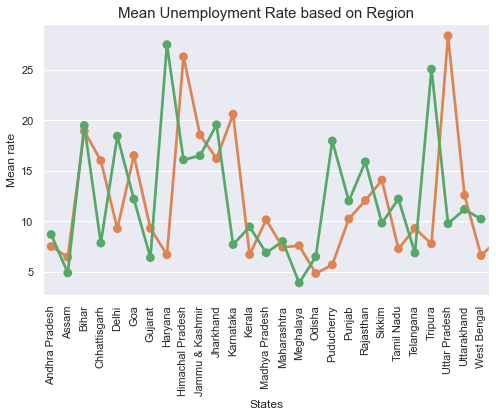

In [221]:
# take the mean of rate state by state
grouped_df = data.groupby(["Region"])["Unemployment_Rate"].aggregate("mean").reset_index()
grouped_df2 = data2.groupby(["Region"])["Unemployment_Rate"].aggregate("mean").reset_index()

plt.figure(figsize=(8,5))
sns.pointplot(grouped_df['Region'].values, grouped_df['Unemployment_Rate'].values, alpha=0.8, color=color[1])
sns.pointplot(grouped_df2['Region'].values, grouped_df2['Unemployment_Rate'].values, alpha=0.8, color=color[2])
plt.ylabel('Mean rate', fontsize=12)
plt.xlabel('States', fontsize=12)
plt.title("Mean Unemployment Rate based on Region", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

The top 4 states leading in unemployment were Uttar Pradesh, Haryana, Himachal Pradesh and Tripura

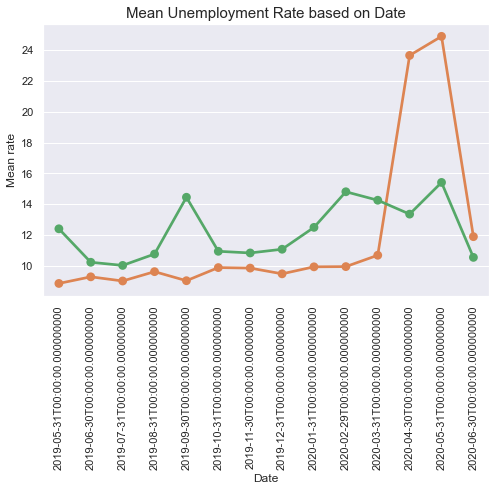

In [220]:
# take the mean of rate state by state
grouped_df = data.groupby(["Date"])["Unemployment_Rate"].aggregate("mean").reset_index()
grouped_df2 = data2.groupby(["Date"])["Unemployment_Rate"].aggregate("mean").reset_index()

plt.figure(figsize=(8,5))
sns.pointplot(grouped_df['Date'].values, grouped_df['Unemployment_Rate'].values, alpha=0.8, color=color[1])
sns.pointplot(grouped_df2['Date'].values, grouped_df2['Unemployment_Rate'].values, alpha=0.8, color=color[2])
plt.ylabel('Mean rate', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.title("Mean Unemployment Rate based on Date", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

The unemployment rate was the highest in May of 2020